# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

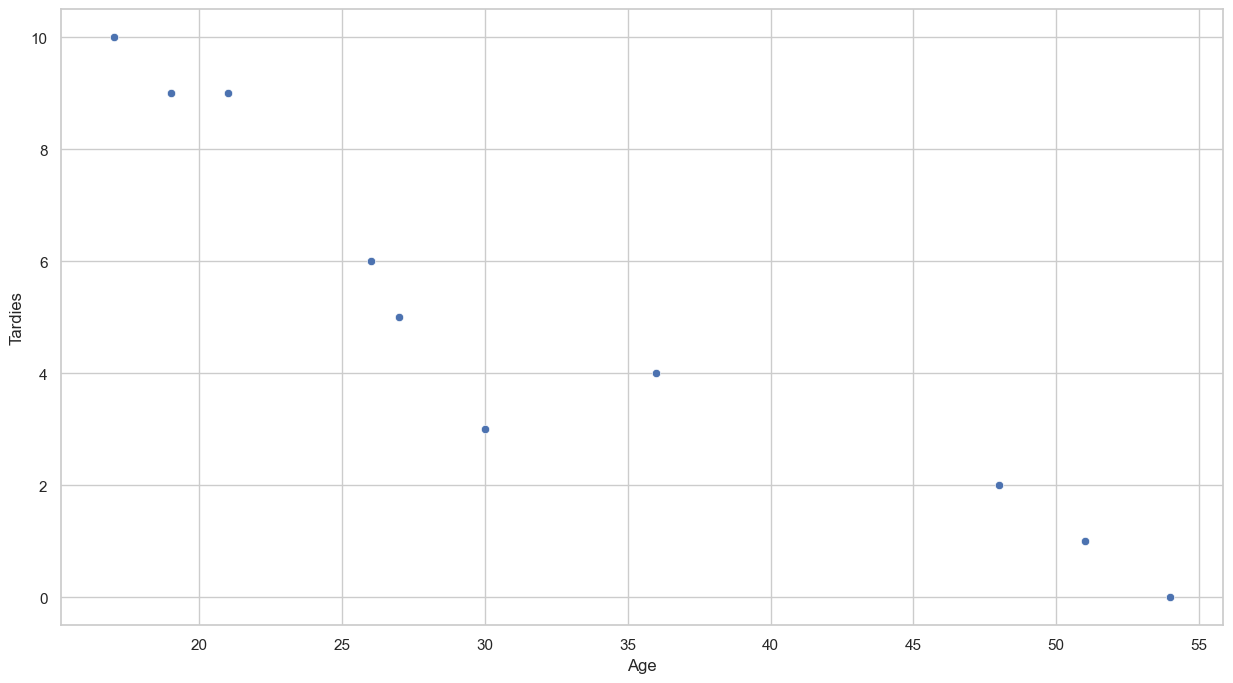

In [3]:
# Your code here.
sns.scatterplot(x = student_data.Age, y = student_data.Tardies)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here
"""Parece que existe una relación negativa entre la edad y el número de veces que llega tarde a clase. Cuanto más joven, 
más veces llega tarde."""

'Parece que existe una relación negativa entre la edad y el número de veces que llega tarde a clase. Cuanto más joven, \nmás veces llega tarde.'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
print (student_data[['Age','Tardies']].corr())
print (student_data[['Age','Tardies']].cov())
"""Ambos son valores negativos confirmando la relacion negativa entre las dos variables. Sin embargo, la covariancia nos muestra
como las dos variables difieren una de otra, cuando una aumenta, la otra disminuye. Mientras que la correlación muestra como 
de relacionadas estan"""

              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000
                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


'Ambos son valores negativos confirmando la relacion negativa entre las dos variables. Sin embargo, la covariancia nos muestra\ncomo las dos variables difieren una de otra, cuando una aumenta, la otra disminuye. Mientras que la correlación muestra como \nde relacionadas estan'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.
result = smf.ols("Tardies ~ Age", data=student_data).fit()
"""Usamos una regresion lineal simple con el método Ordinary Least Squares donde la variable independiente es la edad y la 
dependiente el número de veces que llega tarde"""

'Usamos una regresion lineal simple con el método Ordinary Least Squares donde la variable independiente es la edad y la \ndependiente el número de veces que llega tarde'

Plot your regression model on your scatter plot.

In [7]:
student_data['Prediction_Tardies'] = result.predict(student_data['Age'])
student_data['Error'] = (student_data.Tardies - student_data.Prediction_Tardies).abs()

In [8]:
student_data


,Age,Tardies,Prediction_Tardies,Error
0,17,10,8.760850,1.239150
1,51,1,0.504944,0.495056
2,27,5,6.332643,1.332643
3,21,9,7.789567,1.210433
4,36,4,4.147256,0.147256
5,48,2,1.233406,0.766594
6,19,9,8.275209,0.724791
7,26,6,6.575463,0.575463
8,54,0,-0.223518,0.223518
9,30,3,5.604180,2.604180


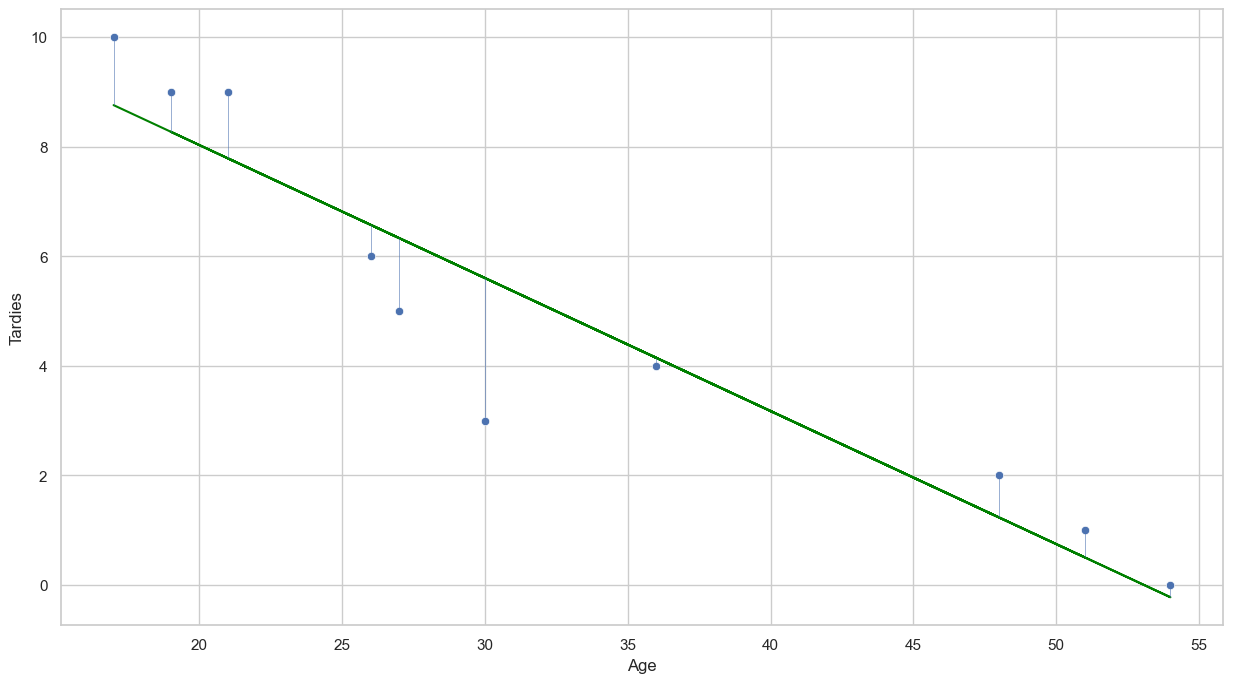

In [9]:
# Your code here.
sns.scatterplot(x = student_data.Age, y = student_data.Tardies)
plt.plot(student_data.Age, student_data['Prediction_Tardies'], c="green", label="Prediction")
plt.vlines(student_data.Age, student_data.Prediction_Tardies, student_data.Tardies, lw=0.4); # RSS

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [10]:
# Your response here. 
result.summary()

C:\Users\manya\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           5.57e-05
Time:                        18:30:21   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
"""Este modelo explica un 88.8% la variabilidad de y (número de veces que llega tarde), respecto a x (Edad). 
En ambos coeficientes el p-value es 0, por lo que podemos rechazar la hipótesis nula (coeficiente = 0, no tiene efecto
en la variable dependiente), de forma que podemos decir que la variable edad si que tiene una efecto significativo en el
número de veces que llega tarde. Por otro lado, también podemos determinar el coeficiente de edad es mucho más acurado
que el intercepto ya que el intervalo de confiança es mucho más pequeño."""

'Este modelo explica un 88.8% la variabilidad de y (número de veces que llega tarde), respecto a x (Edad). \nEn ambos coeficientes el p-value es 0, por lo que podemos rechazar la hipótesis nula (coeficiente = 0, no tiene efecto\nen la variable dependiente), de forma que podemos decir que la variable edad si que tiene una efecto significativo en el\nnúmero de veces que llega tarde. Por otro lado, también podemos determinar el coeficiente de edad es mucho más acurado\nque el intercepto ya que el intervalo de confiança es mucho más pequeño.'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [12]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")
vehicles.columns
vehicles.drop(columns = ['Make', 'Model', 'Engine Displacement', 'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type', 'City MPG', 'Highway MPG'], inplace = True)

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

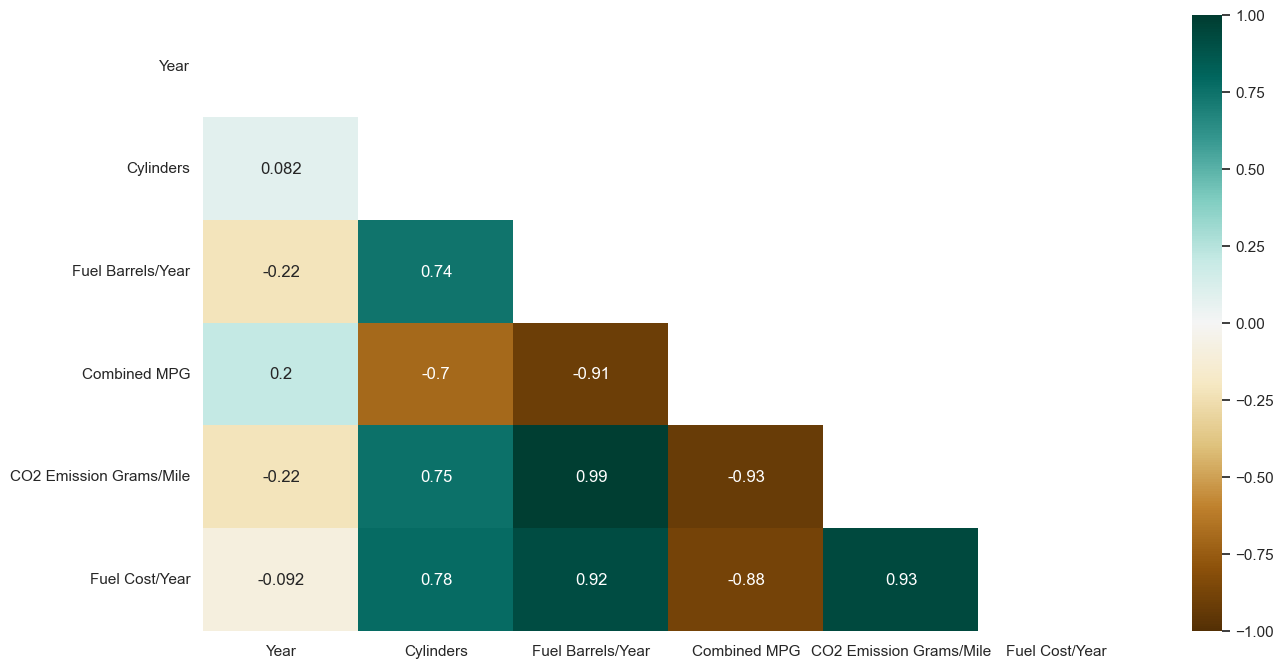

In [13]:
# Your response here. 
mask = np.triu(np.ones_like(vehicles.corr()))
heatmap = sns.heatmap(vehicles.corr(), mask = mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [14]:
"""La variable con una menor correlación con 'Co2 Emissions Grams/Miles' es Year, mientras que las otras variables
tienen correlaciones tanto positivas como negativas, pero con coeficientes más elevados. """

"La variable con una menor correlación con 'Co2 Emissions Grams/Miles' es Year, mientras que las otras variables\ntienen correlaciones tanto positivas como negativas, pero con coeficientes más elevados. "

In [15]:
vehicles.columns

Index(['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [21]:
vehicles.rename(columns={"Fuel Barrels/Year": "Fuel_Barrels", "Combined MPG": "Combined_MPG", "CO2 Emission Grams/Mile": "CO2Emission_Grams",
               "Fuel Cost/Year":"Fuel_Cost"}, inplace = True)

In [22]:
vehicles

,Year,Cylinders,Fuel_Barrels,Combined_MPG,CO2Emission_Grams,Fuel_Cost
0,1984,4.0,19.388824,17,522.764706,1950
1,1984,6.0,25.354615,13,683.615385,2550
2,1985,4.0,20.600625,16,555.437500,2100
3,1985,6.0,25.354615,13,683.615385,2550
4,1987,6.0,20.600625,16,555.437500,2550
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,244.000000,1100
35948,2014,3.0,9.155833,36,243.000000,1100
35949,2015,3.0,9.155833,36,244.000000,1100
35950,2016,3.0,9.155833,36,246.000000,1100


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [23]:
# Your response here. 
results = smf.ols("CO2Emission_Grams ~ Cylinders + Fuel_Barrels + Combined_MPG + Year + Fuel_Cost", data = vehicles).fit()
"""I am using a multiple OLS regression"""

'I am using a multiple OLS regression'

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [24]:
# Your response here. 
results.summary()
"""Los coeficientes de todas la variables independientes tienen efecto en la variable Y ya que el p-value de estas es menor
a 0.05, por lo tanto, podemos refutar la hipótesis nula de que no tienen efecto. Sin embargo, las variables que tienen más
peso en explicar las emisiones de CO2 son Fuel_Barrels y Combined_MPG ya que los coeficientes son mayores en términos absolutos. 
Por otro lado, el intervalo de confianza de todos los coeficientes es pequeño, así que podemos determinar que los coeficientes 
estan bastante ajustado con excepción del intercepto."""

'Los coeficientes de todas la variables independientes tienen efecto en la variable Y ya que el p-value de estas es menor\na 0.05, por lo tanto, podemos refutar la hipótesis nula de que no tienen efecto. Sin embargo, las variables que tienen más\npeso en explicar las emisiones de CO2 son Fuel_Barrels y Combined_MPG ya que los coeficientes son mayores en términos absolutos. \nPor otro lado, el intervalo de confianza de todos los coeficientes es pequeño, así que podemos determinar que los coeficientes \nestan bastante ajustado con excepción del intercepto.'

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [25]:
# Your code here. 
df = pd.DataFrame({'X' : [1,3,4,6,8,9,11,14], 'Y' : [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

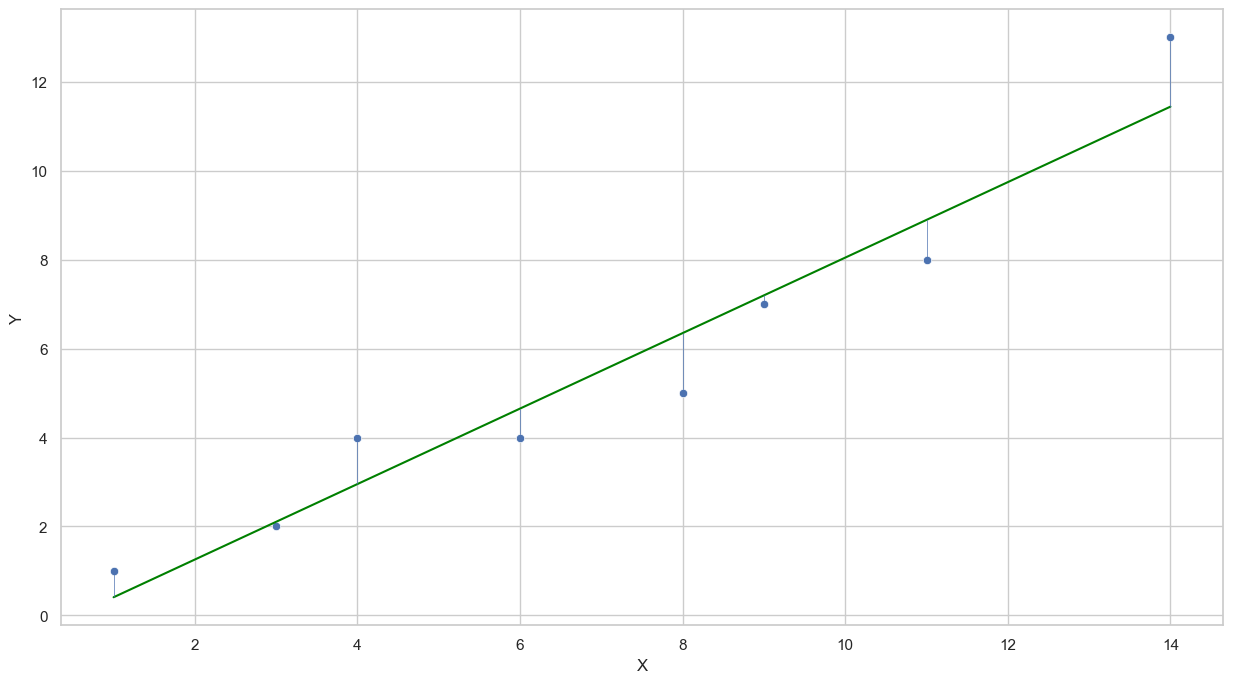

In [26]:
# Your code here.

prediction_results = smf.ols('Y ~ X', data = df).fit()
df['prediction'] = prediction_results.predict(df.X)
df['Error'] = (df.Y - df.prediction).abs()

sns.scatterplot (x = df.X, y = df.Y)
plt.plot(df.X, df.prediction, c="green", label="Prediction")
plt.vlines(df.X, df.prediction, df.Y, lw=0.5);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [27]:
# Your response here. 
prediction_results.summary()
#"""El intercepto no tiene efecto significativo en la variable X ya que el p-value > 0.05, pero la varible X si que tiene
#un efecto positivo sobre la variable Y. Por otro lado, podemos concluir que el modelo explica un 03% la variabilidad de Y."""

C:\Users\manya\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           0.000102
Time:                        18:32:19   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [28]:
prediction_results.resid

0    0.590909
1   -0.106061
2    1.045455
3   -0.651515
4   -1.348485
5   -0.196970
6   -0.893939
7    1.560606
dtype: float64

In [29]:
df1 = df.copy()

In [30]:
df1.drop([7])

,X,Y,prediction,Error
0,1,1,0.409091,0.590909
1,3,2,2.106061,0.106061
2,4,4,2.954545,1.045455
3,6,4,4.651515,0.651515
4,8,5,6.348485,1.348485
5,9,7,7.196970,0.196970
6,11,8,8.893939,0.893939


<AxesSubplot:xlabel='X', ylabel='Y'>

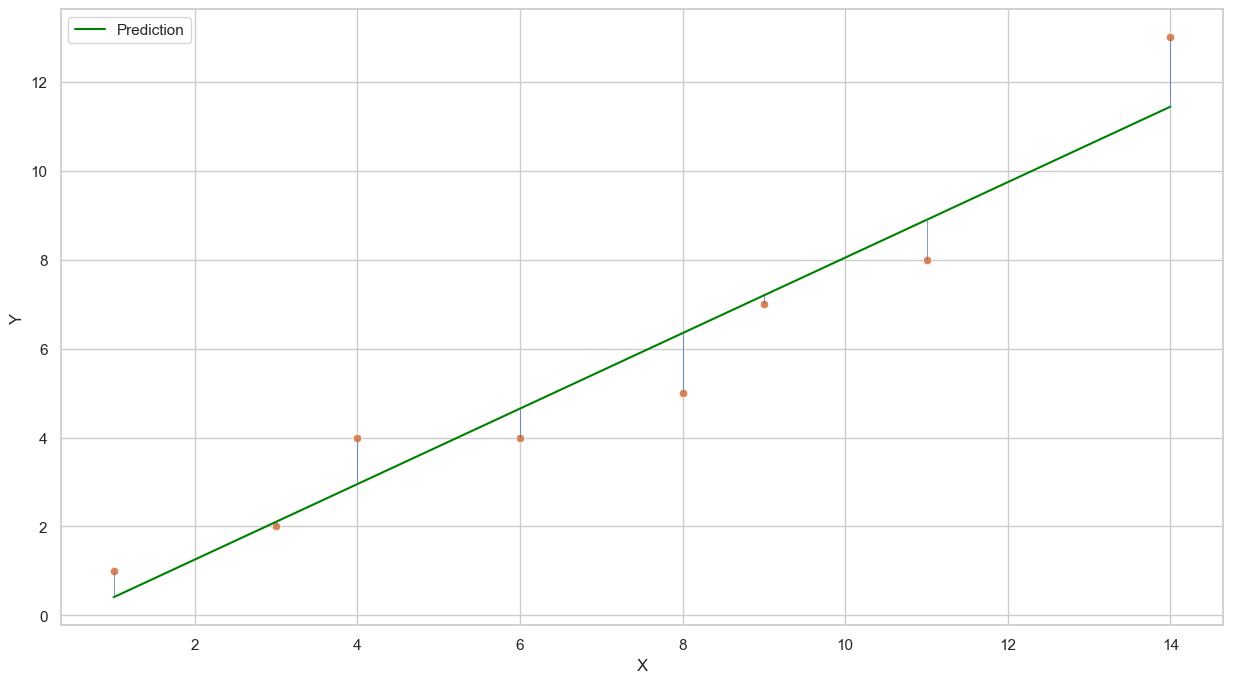

In [31]:
# Your response here. 
prediction_results = smf.ols('Y ~ X', data = df1).fit()
df1['prediction'] = prediction_results.predict(df1.X)
df1['Error'] = (df1.Y - df1.prediction).abs()

sns.scatterplot (x = df1.X, y = df1.Y)
plt.plot(df1.X, df1.prediction, c="green", label="Prediction")
plt.vlines(df1.X, df1.prediction, df1.Y, lw=0.5);

sns.scatterplot(x = 'X', y = 'Y', data = df1)

In [33]:
prediction_results.summary()

C:\Users\manya\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           0.000102
Time:                        18:34:48   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 